I entend to demonstrate my knowledge regarding the techniques used in this case for a clustering model. And my knowledge in Python!

In [1]:
# import packages
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# load dataset
iris = load_iris()

# convert to a pandas dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# create a column named "target"
df["target"] = iris.target

# have a look at the dataframe
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [2]:
print(df.shape[0], "rows and", df.shape[1], "columns")

150 rows and 5 columns


In [3]:
# have a glance on the df information and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [4]:
# Checking the target distribuition or classes
df["target"].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


X = df.drop(columns=["target"])
y = df["target"]

# Splitting dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

# Validation
X_val_train, X_val_data, y_val_train, y_val_data = train_test_split(X_train, y_train, test_size = 0.15, random_state = 434)

print("Train: {}".format(len(X_train)))
print("Validation: {}".format(len(X_val_data)))
print("Test: {}".format(len(X_test)))

Train: 105
Validation: 16
Test: 45


In [6]:
# Checking the best k value
# Range of k values to test (just to illustrate since we already know it's 3)
kVals = range(1, 10,2)

# an empty list to insert the results
accuracy = []

# Loop through each of the k values to test each one
for k in kVals:
    
    # Training the KNN model with each value of k
    modelKNN = KNeighborsClassifier(n_neighbors = k)
    modelKNN.fit(X_val_train, y_val_train)
          
    # Evaluating the model and updating the list of accuracies
    score = modelKNN.score(X_val_data, y_val_data)
    print("Considering the K value of k = %d, the accuracy is = %.2f%%" % (k, score * 100)) # valores da df de validação!!!
    accuracy.append(score)
    
# Obtaining the greater value of k, the highest accuracy
i = np.argmax(accuracy)
print("The value of k = %d achieved the highest accuracy of %.2f%% in the validation data!" % (kVals[i], 
                                                                                             accuracy[i] * 100))

Considering the K value of k = 1, the accuracy is = 81.25%
Considering the K value of k = 3, the accuracy is = 93.75%
Considering the K value of k = 5, the accuracy is = 81.25%
Considering the K value of k = 7, the accuracy is = 93.75%
Considering the K value of k = 9, the accuracy is = 87.50%
The value of k = 3 achieved the highest accuracy of 93.75% in the validation data!


In [7]:
# Creating the final version of the model using the highest value of k
finalKNN = KNeighborsClassifier(n_neighbors = kVals[i])

finalKNN.fit(X_train, y_train)

# Predictions
predictions = finalKNN.predict(X_test)

# Classification Report
print("Model Evaluation using Test Data")
print(classification_report(y_test, predictions))

Model Evaluation using Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



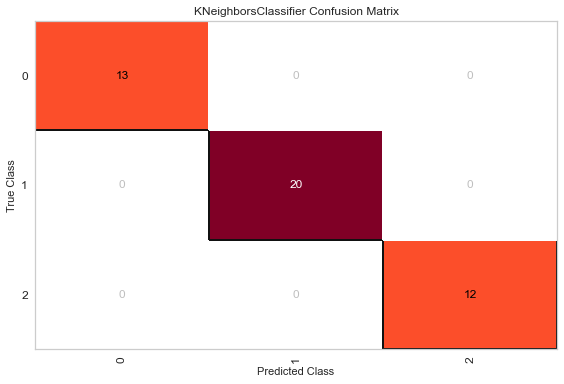

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [8]:
from yellowbrick.classifier import ConfusionMatrix

# Confusion matrix
cm = ConfusionMatrix(finalKNN, classes=finalKNN.classes_)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

# Visualize the confusion matrix
cm.show()

### Happy code!!!